In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
# Load the dataset

df = pd.read_excel('Data_ML.xlsx', decimal=',')
df.head()

,Cycle ID,Voltage,Current,SOC
0,1,3085.9,179.5,0.037923
1,1,3085.9,179.5,0.037951
2,1,3085.9,179.5,0.037979
3,1,3087.1,179.6,0.038007
4,1,3087.1,179.6,0.038035


In [ ]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197297 entries, 0 to 197296
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cycle ID  197297 non-null  int64  
 1   Voltage   197297 non-null  float64
 2   Current   197297 non-null  float64
 3   SOC       190566 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 6.0 MB


In [ ]:
# statistical info

df.describe()

,Cycle ID,Voltage,Current,SOC
count,197297.000000,197297.000000,197297.000000,190566.000000
mean,1.499683,3291.211307,0.742623,0.513205
std,0.500001,125.329302,185.670147,0.286611
min,1.000000,2699.300000,-239.500000,0.000000
25%,1.000000,3250.500000,-179.100000,0.265549
50%,1.000000,3297.600000,0.000000,0.513097
75%,2.000000,3353.700000,179.600000,0.760623
max,2.000000,3600.800000,239.700000,1.000000


In [ ]:
# Drop data with missing value

df_new = df.dropna()

In [ ]:
# Check duplicated data

df_new.duplicated().sum()

np.int64(3142)

In [ ]:
# Drop duplicates

df_new = df_new.drop_duplicates()

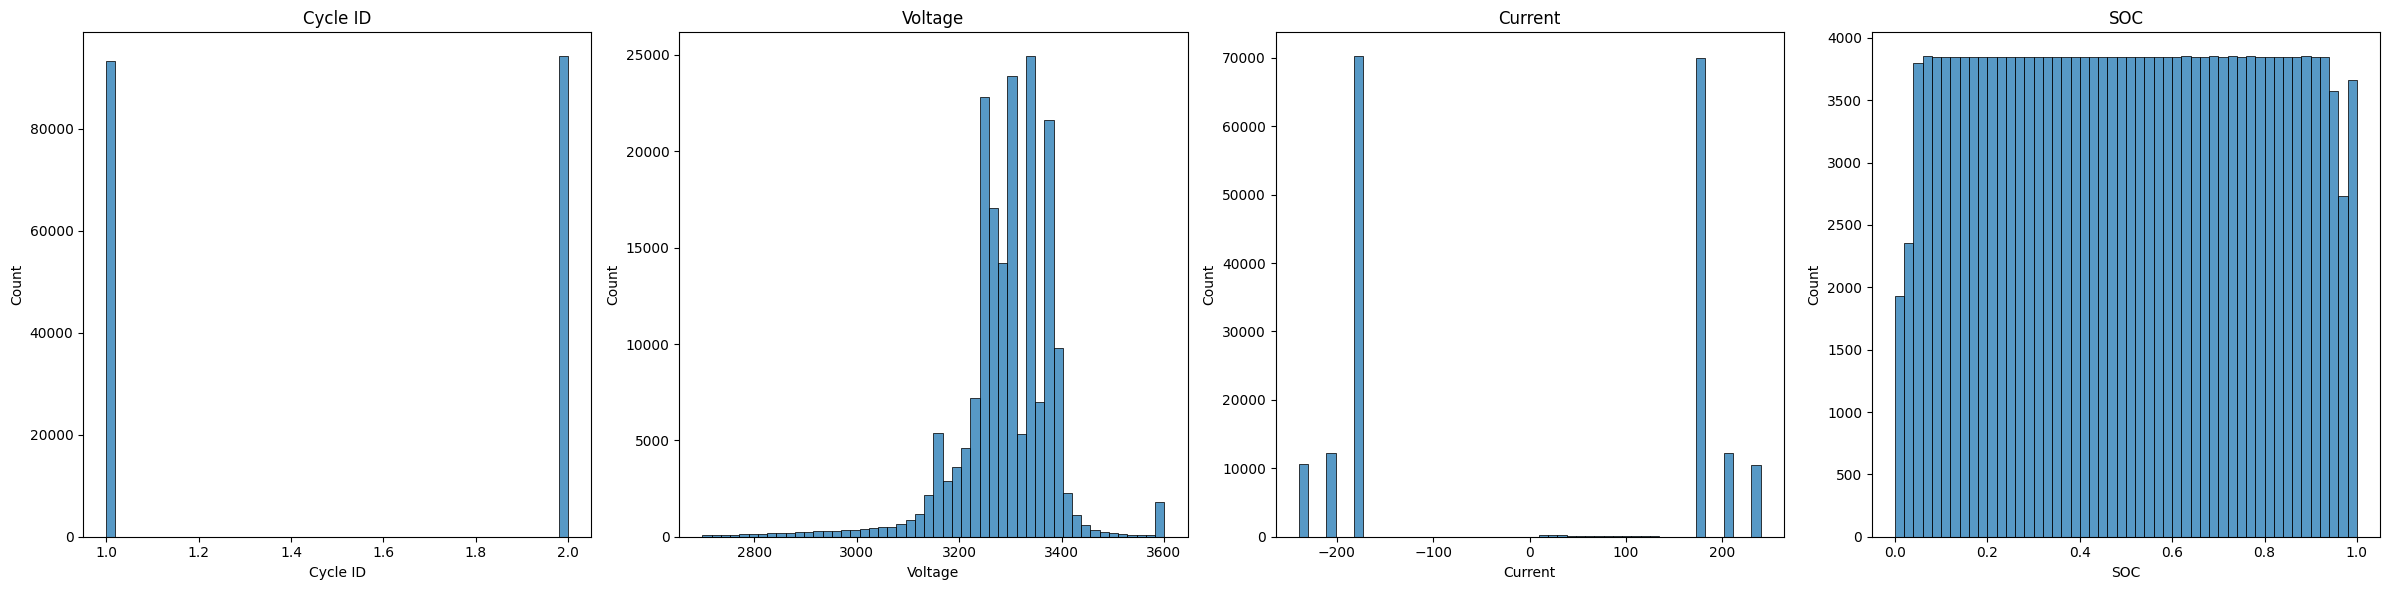

In [ ]:
def visualisasi_histogram(df):
    num_cols = df.select_dtypes(include=['number']).columns  # Pilih kolom numerik
    num_plots = len(num_cols)
    num_rows = (num_plots + 3) // 4  # Hitung jumlah baris yang dibutuhkan

    fig, axes = plt.subplots(num_rows, 4, figsize=(24, num_rows * 6))  # Sesuaikan ukuran figur

    # Flatten the axes array if it's 2D, so we can iterate over a single list
    if num_rows > 1:
        axes = axes.flatten()
    elif num_rows == 1 and num_plots <= 4:
         # If there's only one row but potentially less than 4 plots, ensure axes is iterable
         axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes] # Ensure axes is a list even for a single plot

    for i, col in enumerate(num_cols):
        # Access the flattened axes array using a single index i
        sns.histplot(x=col, data=df, bins=50, ax=axes[i])  # Gunakan histplot dari seaborn
        axes[i].set_title(col)

    # Turn off unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Atur tata letak agar tidak tumpang tindih
    plt.show()

visualisasi_histogram(df_new)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187424 entries, 0 to 197055
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cycle ID  187424 non-null  int64  
 1   Voltage   187424 non-null  float64
 2   Current   187424 non-null  float64
 3   SOC       187424 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 7.1 MB


In [ ]:
df_new.describe()

,Cycle ID,Voltage,Current,SOC
count,187424.000000,187424.000000,187424.000000,187424.000000
mean,1.502481,3290.413834,0.394801,0.505044
std,0.499995,95.841979,190.458371,0.281929
min,1.000000,2699.300000,-239.500000,0.000000
25%,1.000000,3250.800000,-179.100000,0.261472
50%,2.000000,3297.000000,40.100000,0.504928
75%,2.000000,3345.400000,179.600000,0.748374
max,2.000000,3600.800000,239.700000,1.000000


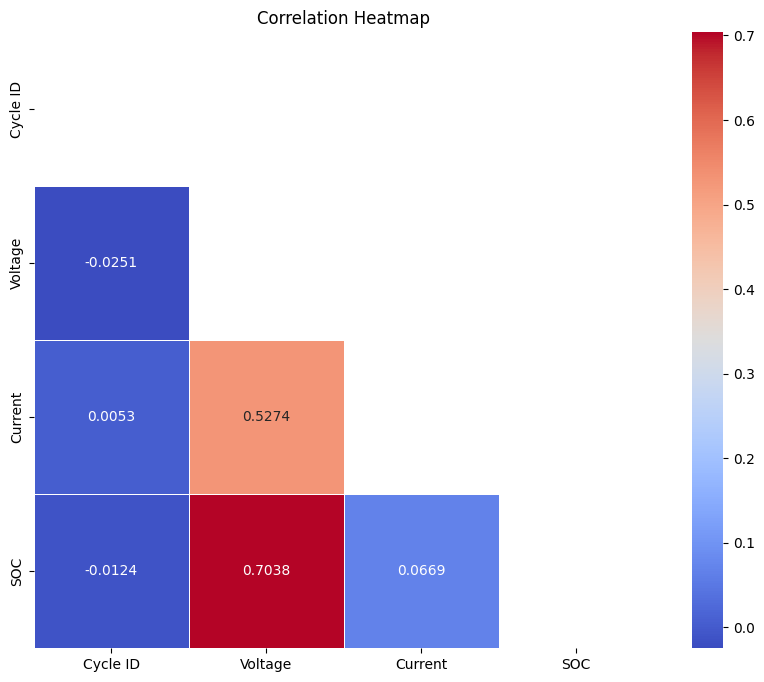

In [ ]:
# Correlation for all columns

plt.figure(figsize=(10, 8))

sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5, mask=np.triu(df_new.corr()))
plt.title('Correlation Heatmap')
plt.show()

# Tanpa Kolom "Cycle ID"

## Data Preprocessing

In [ ]:
# Variable setting

X_1 = df_new.drop(columns=['Cycle ID', 'SOC'])
y_1 = df_new['SOC']

In [ ]:
# Data splitting

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.1, random_state=42)

In [ ]:
# Data normalization

scaler_1 = MinMaxScaler()
X_train_1 = scaler_1.fit_transform(X_train_1)

## Modeling

### DNN

In [ ]:
# Build Model
model_dnn_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile Model
model_dnn_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'mae',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary

model_dnn_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the model

history_1 = model_dnn_1.fit(
    X_train_1, y_train_1,
    epochs=30,  # Increased to allow for convergence
    batch_size=64,  # Adjusted for balance between stability and speed
    verbose=1
)

Epoch 1/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0805 - mean_squared_error: 0.0180
Epoch 2/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0323 - mean_squared_error: 0.0019
Epoch 3/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0310 - mean_squared_error: 0.0018
Epoch 4/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0297 - mean_squared_error: 0.0017
Epoch 5/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0292 - mean_squared_error: 0.0017
Epoch 6/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0016
Epoch 7/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0274 - mean_squared_error: 0.0015
Epoch 8/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0255 - mean_squared_error: 0.0013
Epoch 9/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0012
Epoch 10/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0222 - mean_squared_error: 0.0011
Epoch 11/30
2636

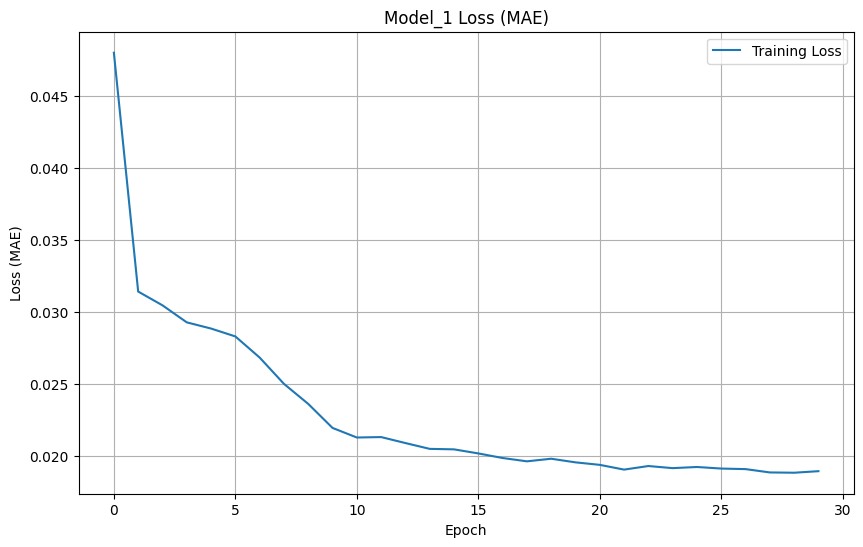

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.title('Model_1 Loss (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_test_1 = scaler_1.transform(X_test_1)

In [ ]:
y_pred_dnn_1 = model_dnn_1.predict(X_test_1)

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mean_squared_error(y_test_1, y_pred_dnn_1)

0.0007259969396053946

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_1, y_pred_dnn_1)))* 100
mae_persentase = (mean_absolute_error(y_test_1, y_pred_dnn_1))* 100
r2_persentase = r2_score(y_test_1, y_pred_dnn_1)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 2.6944 %
MAE model: 1.7027 %
R2 score model: 99.0946 %


### Random forest Regressor

In [ ]:
model_rfr_1 = RandomForestRegressor(random_state = seed_value)
model_rfr_1.fit(X_train_1, y_train_1)
y_pred_rfr_1 = model_rfr_1.predict(X_test_1)
mean_squared_error(y_test_1, y_pred_rfr_1)

0.00033969365777001317

17 detik

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_1, y_pred_rfr_1)))* 100
mae_persentase = (mean_absolute_error(y_test_1, y_pred_rfr_1))* 100
r2_persentase = r2_score(y_test_1, y_pred_rfr_1)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 1.8431 %
MAE model: 1.0483 %
R2 score model: 99.5763 %


### Decision Tree

In [ ]:
model_dt_1 = DecisionTreeRegressor(random_state = seed_value)
model_dt_1.fit(X_train_1, y_train_1)
y_pred_dt_1 = model_dt_1.predict(X_test_1)
mean_squared_error(y_test_1, y_pred_dt_1)

0.0003403225664906301

< 1 detik

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_1, y_pred_dt_1)))* 100
mae_persentase = (mean_absolute_error(y_test_1, y_pred_dt_1))* 100
r2_persentase = r2_score(y_test_1, y_pred_dt_1)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 1.8448 %
MAE model: 1.0490 %
R2 score model: 99.5756 %


### Gradient Boosting Regression

In [ ]:
model_gbr_1 = GradientBoostingRegressor(random_state = seed_value)
model_gbr_1.fit(X_train_1, y_train_1)
y_pred_gbr_1 = model_gbr_1.predict(X_test_1)
mean_squared_error(y_test_1, y_pred_gbr_1)

0.0006808392094200292

10 detik

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_1, y_pred_gbr_1)))* 100
mae_persentase = (mean_absolute_error(y_test_1, y_pred_gbr_1))* 100
r2_persentase = r2_score(y_test_1, y_pred_gbr_1)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 2.6093 %
MAE model: 1.9225 %
R2 score model: 99.1509 %


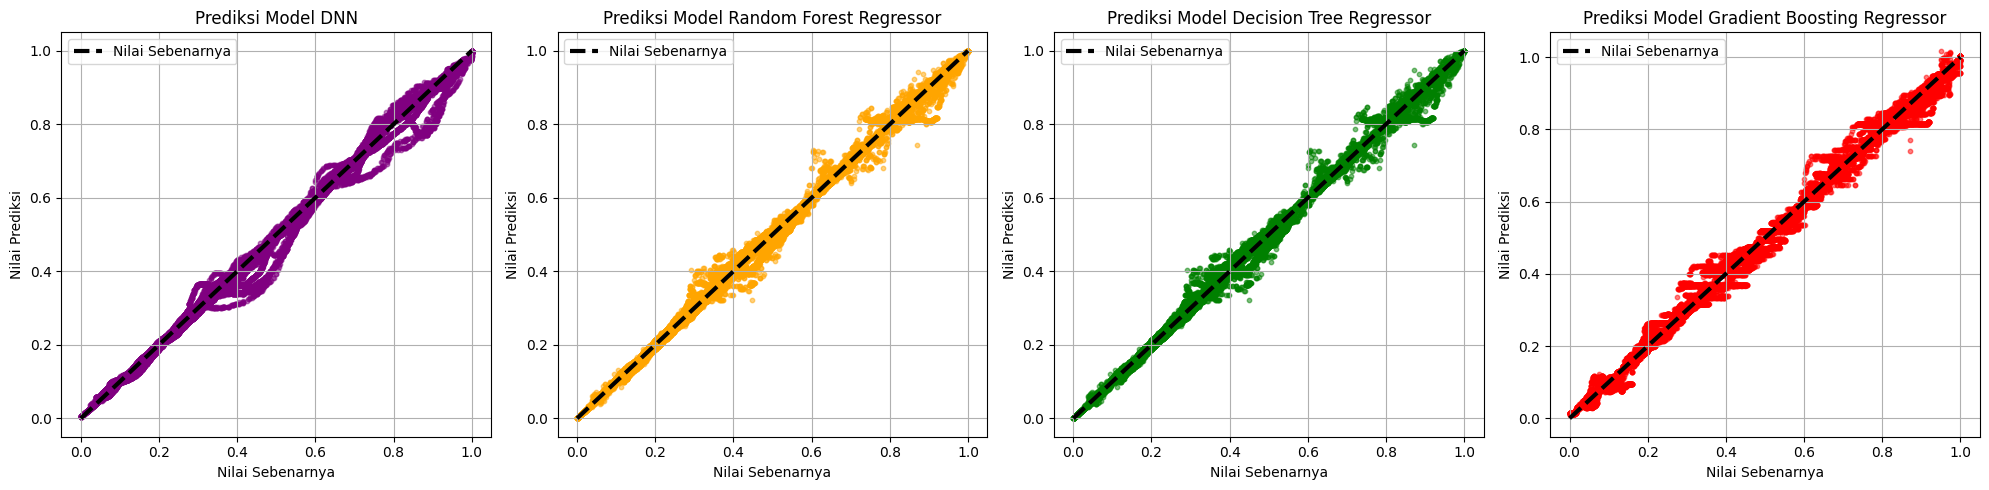

In [ ]:
# Asumsikan Anda sudah memiliki variabel y_true, y_pred_1, y_pred_2, y_pred_3, y_pred_4

# Pastikan y_true adalah numpy array jika belum
y_true = y_test_1.values if isinstance(y_test_1, pd.Series) else y_test_1

# Buat figure dan axes dengan 1 baris dan 4 kolom
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) # Sesuaikan ukuran figure sesuai kebutuhan

# Plot untuk y_true vs y_pred_1
axes[0].scatter(y_true, y_pred_dnn_1, alpha=0.5, color='purple', s=10)
axes[0].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[0].set_xlabel("Nilai Sebenarnya")
axes[0].set_ylabel("Nilai Prediksi")
axes[0].set_title("Prediksi Model DNN")
axes[0].legend()
axes[0].grid(True)

# Plot untuk y_true vs y_pred_2
axes[1].scatter(y_true, y_pred_rfr_1, alpha=0.5, color='orange', s=10)
axes[1].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[1].set_xlabel("Nilai Sebenarnya")
axes[1].set_ylabel("Nilai Prediksi")
axes[1].set_title("Prediksi Model Random Forest Regressor")
axes[1].legend()
axes[1].grid(True)

# Plot untuk y_true vs y_pred_3
axes[2].scatter(y_true, y_pred_dt_1, alpha=0.5, color='green', s=10)
axes[2].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[2].set_xlabel("Nilai Sebenarnya")
axes[2].set_ylabel("Nilai Prediksi")
axes[2].set_title("Prediksi Model Decision Tree Regressor")
axes[2].legend()
axes[2].grid(True)

# Plot untuk y_true vs y_pred_4
axes[3].scatter(y_true, y_pred_gbr_1, alpha=0.5, color='red', s=10)
axes[3].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[3].set_xlabel("Nilai Sebenarnya")
axes[3].set_ylabel("Nilai Prediksi")
axes[3].set_title("Prediksi Model Gradient Boosting Regressor")
axes[3].legend()
axes[3].grid(True)

# Atur tata letak agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

# Dengan Kolom "Cycle ID"

## Data Preprocessing

In [ ]:
X_2 = df_new.drop(columns=['SOC'])
y_2 = df_new['SOC']

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.1, random_state=42)

In [ ]:
scaler_2 = MinMaxScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)

## Modeling

### DNN

In [ ]:
# Build Model
model_dnn_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_2.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile Model
model_dnn_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'mae',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary

model_dnn_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the model

history = model_dnn_2.fit(
    X_train_2, y_train_2,
    epochs=30,  # Increased to allow for convergence
    batch_size=64,  # Adjusted for balance between stability and speed
    verbose=1
)

Epoch 1/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0835 - mean_squared_error: 0.0186
Epoch 2/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0314 - mean_squared_error: 0.0019
Epoch 3/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0299 - mean_squared_error: 0.0017
Epoch 4/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0291 - mean_squared_error: 0.0016
Epoch 5/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0016
Epoch 6/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0266 - mean_squared_error: 0.0014
Epoch 7/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0251 - mean_squared_error: 0.0013
Epoch 8/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0012
Epoch 9/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0224 - mean_squared_error: 0.0011
Epoch 10/30
2636/2636 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0209 - mean_squared_error: 0.0010
Epoch 11/30


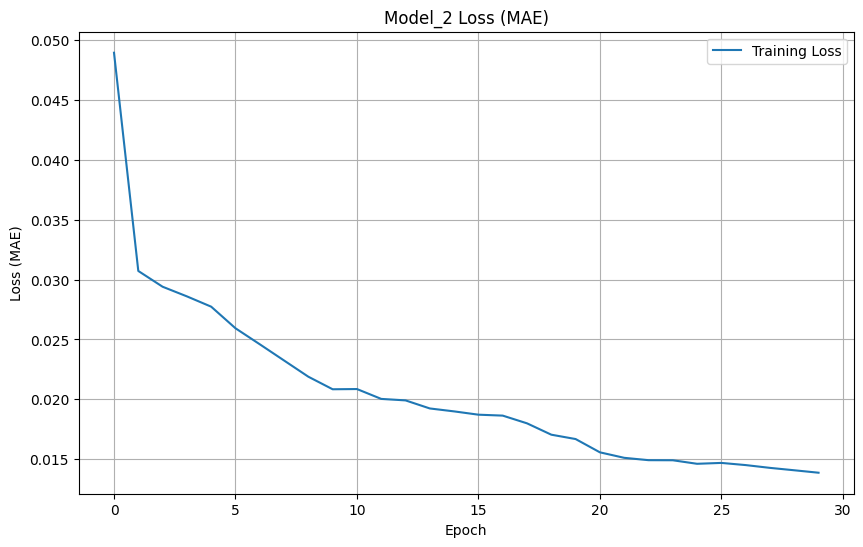

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model_2 Loss (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_test_2 = scaler_2.transform(X_test_2)

In [ ]:
y_pred_dnn_2 = model_dnn_2.predict(X_test_2)

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
mean_squared_error(y_test_2, y_pred_dnn_2)

0.0005498279561761838

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_2, y_pred_dnn_2)))* 100
mae_persentase = (mean_absolute_error(y_test_2, y_pred_dnn_2))* 100
r2_persentase = r2_score(y_test_2, y_pred_dnn_2)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 2.3448 %
MAE model: 1.5189 %
R2 score model: 99.3143 %


### Random Forest Regressor

In [ ]:
model_rfr_2 = RandomForestRegressor(random_state = seed_value)
model_rfr_2.fit(X_train_2, y_train_2)
y_pred_rfr_2 = model_rfr_2.predict(X_test_2)
mean_squared_error(y_test_2, y_pred_rfr_2)

0.00010999353517617214

19 detik

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_2, y_pred_rfr_2)))* 100
mae_persentase = (mean_absolute_error(y_test_2, y_pred_rfr_2))* 100
r2_persentase = r2_score(y_test_2, y_pred_rfr_2)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 1.0488 %
MAE model: 0.3153 %
R2 score model: 99.8628 %


### Decision Tree

In [ ]:
model_dt_2 = DecisionTreeRegressor(random_state = seed_value)
model_dt_2.fit(X_train_2, y_train_2)
y_pred_dt_2 = model_dt_2.predict(X_test_2)
mean_squared_error(y_test_2, y_pred_dt_2)

0.00010991014896947545

< 1 detik

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_2, y_pred_dt_2)))* 100
mae_persentase = (mean_absolute_error(y_test_2, y_pred_dt_2))* 100
r2_persentase = r2_score(y_test_2, y_pred_dt_2)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 1.0484 %
MAE model: 0.3150 %
R2 score model: 99.8629 %


### Gradient Boosting Regression

In [ ]:
model_gbr_2 = GradientBoostingRegressor(random_state = seed_value)
model_gbr_2.fit(X_train_2, y_train_2)
y_pred_gbr_2 = model_gbr_2.predict(X_test_2)
mean_squared_error(y_test_2, y_pred_gbr_2)

0.0005812766431124975

10 detik

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_test_2, y_pred_gbr_2)))* 100
mae_persentase = (mean_absolute_error(y_test_2, y_pred_gbr_2))* 100
r2_persentase = r2_score(y_test_2, y_pred_gbr_2)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 2.4110 %
MAE model: 1.7953 %
R2 score model: 99.2750 %


## Visualisasi

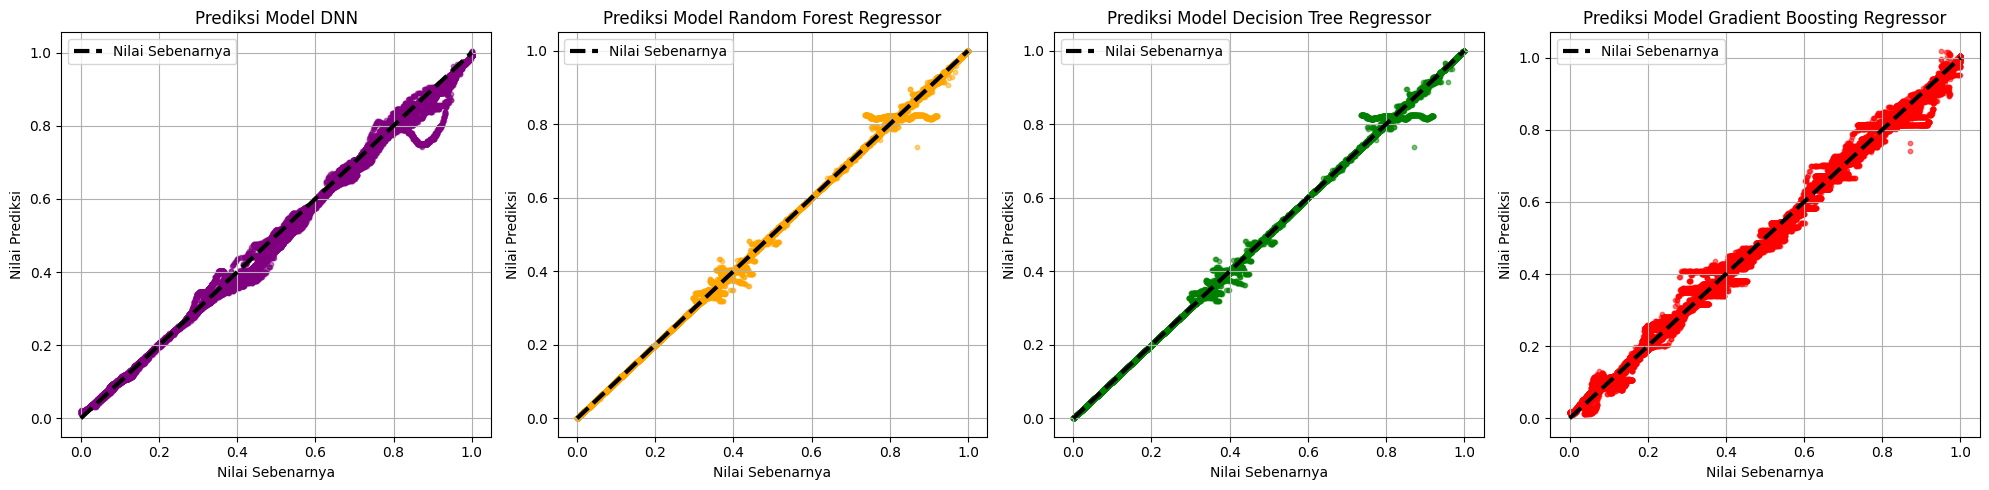

In [ ]:
# Asumsikan Anda sudah memiliki variabel y_true, y_pred_1, y_pred_2, y_pred_3, y_pred_4

# Pastikan y_true adalah numpy array jika belum
y_true = y_test_2.values if isinstance(y_test_2, pd.Series) else y_test_2

# Buat figure dan axes dengan 1 baris dan 4 kolom
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) # Sesuaikan ukuran figure sesuai kebutuhan

# Plot untuk y_true vs y_pred_1
axes[0].scatter(y_true, y_pred_dnn_2, alpha=0.5, color='purple', s=10)
axes[0].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[0].set_xlabel("Nilai Sebenarnya")
axes[0].set_ylabel("Nilai Prediksi")
axes[0].set_title("Prediksi Model DNN")
axes[0].legend()
axes[0].grid(True)

# Plot untuk y_true vs y_pred_2
axes[1].scatter(y_true, y_pred_rfr_2, alpha=0.5, color='orange', s=10)
axes[1].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[1].set_xlabel("Nilai Sebenarnya")
axes[1].set_ylabel("Nilai Prediksi")
axes[1].set_title("Prediksi Model Random Forest Regressor")
axes[1].legend()
axes[1].grid(True)

# Plot untuk y_true vs y_pred_3
axes[2].scatter(y_true, y_pred_dt_2, alpha=0.5, color='green', s=10)
axes[2].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[2].set_xlabel("Nilai Sebenarnya")
axes[2].set_ylabel("Nilai Prediksi")
axes[2].set_title("Prediksi Model Decision Tree Regressor")
axes[2].legend()
axes[2].grid(True)

# Plot untuk y_true vs y_pred_4
axes[3].scatter(y_true, y_pred_gbr_2, alpha=0.5, color='red', s=10)
axes[3].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=3, label='Nilai Sebenarnya')
axes[3].set_xlabel("Nilai Sebenarnya")
axes[3].set_ylabel("Nilai Prediksi")
axes[3].set_title("Prediksi Model Gradient Boosting Regressor")
axes[3].legend()
axes[3].grid(True)

# Atur tata letak agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

# Extreme Testing

In [ ]:
# Load the dataset

df_test = pd.read_excel('Data_test.xlsx', decimal=',')
df_test.head()

,Cycle ID,Voltage,Current,SOC
0,3,2854.9,239.7,0.035293
1,3,2854.9,239.7,0.035474
2,3,2862.7,239.5,0.035656
3,3,2869.2,239.7,0.035838
4,3,2873.2,239.5,0.036019


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cycle ID  11323 non-null  int64  
 1   Voltage   11323 non-null  float64
 2   Current   11323 non-null  float64
 3   SOC       11082 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 354.0 KB


In [ ]:
df_test_new = df_test.dropna()

## Test tanpa Cycle ID

In [ ]:
# Variable setting

X_3 = df_test_new.drop(columns=['Cycle ID', 'SOC'])
y_3 = df_test_new['SOC']

In [ ]:
X_3 = scaler_1.transform(X_3)

In [ ]:
X_3

array([[1.72601220e-01, 1.00000000e+00],
       [1.72601220e-01, 1.00000000e+00],
       [1.81253466e-01, 9.99582638e-01],
       ...,
       [6.54464781e-03, 6.26043406e-04],
       [1.33111481e-03, 4.17362270e-04],
       [6.65557404e-04, 4.17362270e-04]])

In [ ]:
y_pred_dnn_3 = model_dnn_1.predict(X_3)

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_3, y_pred_dnn_3)))* 100
mae_persentase = (mean_absolute_error(y_3, y_pred_dnn_3))* 100
r2_persentase = r2_score(y_3, y_pred_dnn_3)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 6.4806 %
MAE model: 5.2032 %
R2 score model: 95.0318 %


In [ ]:
y_pred_rfr_3 = model_rfr_1.predict(X_3)

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_3, y_pred_rfr_3)))* 100
mae_persentase = (mean_absolute_error(y_3, y_pred_rfr_3))* 100
r2_persentase = r2_score(y_3, y_pred_rfr_3)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 5.7784 %
MAE model: 4.4136 %
R2 score model: 96.0502 %


In [ ]:
y_pred_dt_3 = model_dt_1.predict(X_3)

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_3, y_pred_dt_3)))* 100
mae_persentase = (mean_absolute_error(y_3, y_pred_dt_3))* 100
r2_persentase = r2_score(y_3, y_pred_dt_3)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 5.7869 %
MAE model: 4.4406 %
R2 score model: 96.0385 %


In [ ]:
y_pred_gbr_3 = model_gbr_1.predict(X_3)

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_3, y_pred_gbr_3)))* 100
mae_persentase = (mean_absolute_error(y_3, y_pred_gbr_3))* 100
r2_persentase = r2_score(y_3, y_pred_gbr_3)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 4.6384 %
MAE model: 3.7721 %
R2 score model: 97.4549 %


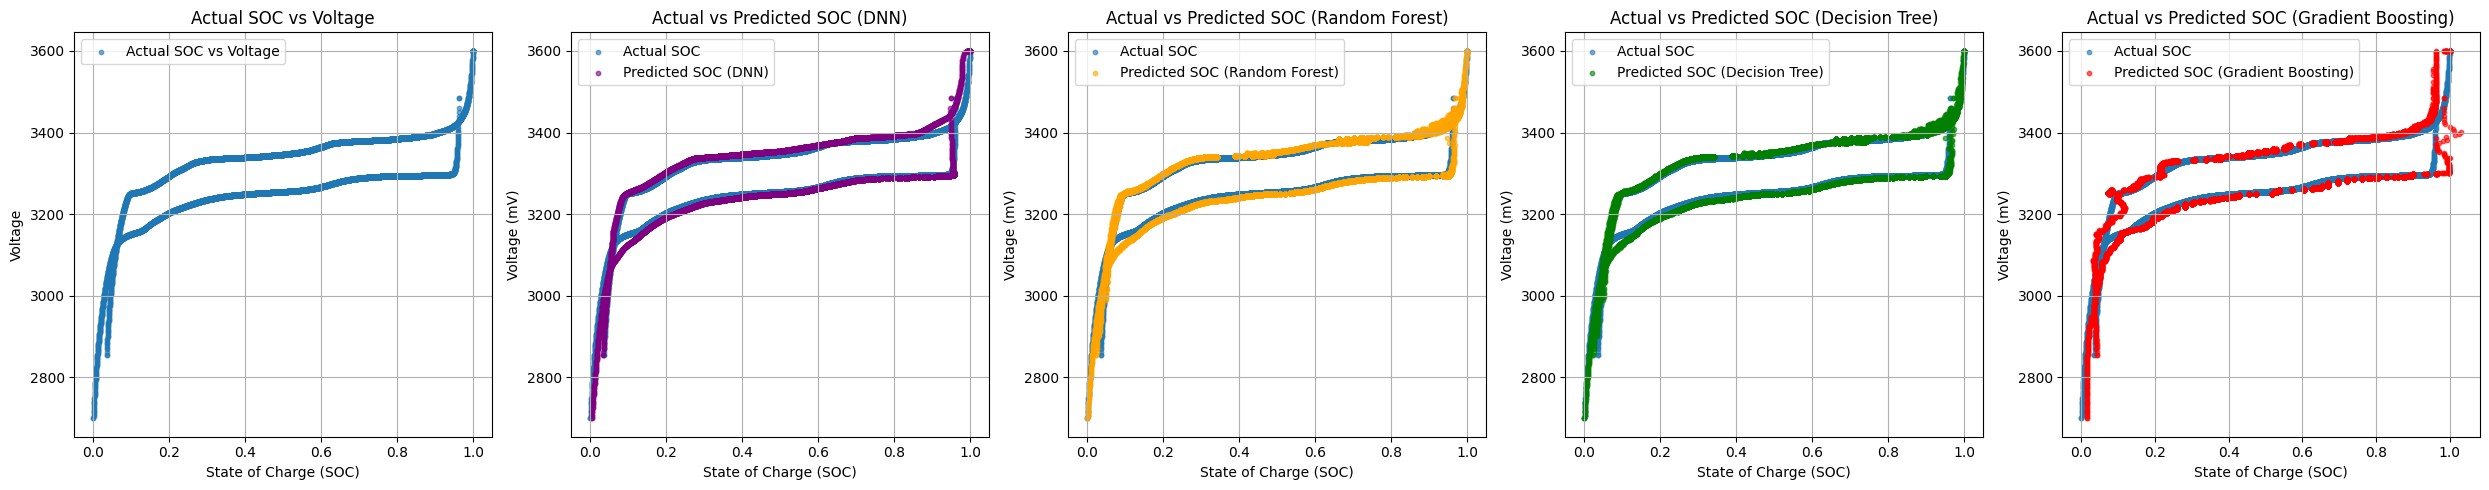

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan Anda sudah memiliki variabel y_true_3, y_pred_dnn_3, y_pred_rfr_3, y_pred_dt_3, y_pred_gbr_3
# dan voltage_test dari df_test_new

# Pastikan y_3 adalah numpy array jika belum
y_true_3 = y_3.values if isinstance(y_3, pd.Series) else y_3
# Pastikan voltage_test adalah numpy array jika belum
voltage_test = df_test_new['Voltage'].values if isinstance(df_test_new['Voltage'], pd.Series) else df_test_new['Voltage']


# Buat figure dan axes dengan 1 baris dan 5 kolom
fig, axes = plt.subplots(1, 5, figsize=(25, 5)) # Menambah 1 kolom, sesuaikan ukuran figure

# Plot untuk Actual SOC vs Voltage (subplot paling kiri)
axes[0].scatter(y_true_3, voltage_test, alpha=0.6, label='Actual SOC vs Voltage', s=10)
axes[0].set_xlabel("State of Charge (SOC)")
axes[0].set_ylabel("Voltage")
axes[0].set_title("Actual SOC vs Voltage")
axes[0].legend()
axes[0].grid(True)


# Plot untuk y_true_3 vs y_pred_dnn_3 (subplot kedua)
axes[1].scatter(y_true_3, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[1].scatter(y_pred_dnn_3, voltage_test, alpha=0.6, color='purple', label='Predicted SOC (DNN)', s=10)
axes[1].set_xlabel("State of Charge (SOC)")
axes[1].set_ylabel("Voltage (mV)")
axes[1].set_title("Actual vs Predicted SOC (DNN)")
axes[1].legend()
axes[1].grid(True)

# Plot untuk y_true_3 vs y_pred_rfr_3 (subplot ketiga)
axes[2].scatter(y_true_3, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[2].scatter(y_pred_rfr_3, voltage_test, alpha=0.6, color='orange', label='Predicted SOC (Random Forest)', s=10)
axes[2].set_xlabel("State of Charge (SOC)")
axes[2].set_ylabel("Voltage (mV)")
axes[2].set_title("Actual vs Predicted SOC (Random Forest)")
axes[2].legend()
axes[2].grid(True)

# Plot untuk y_true_3 vs y_pred_dt_3 (subplot keempat)
axes[3].scatter(y_true_3, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[3].scatter(y_pred_dt_3, voltage_test, alpha=0.6, color='green', label='Predicted SOC (Decision Tree)', s=10)
axes[3].set_xlabel("State of Charge (SOC)")
axes[3].set_ylabel("Voltage (mV)")
axes[3].set_title("Actual vs Predicted SOC (Decision Tree)")
axes[3].legend()
axes[3].grid(True)

# Plot untuk y_true_3 vs y_pred_gbr_3 (subplot kelima)
axes[4].scatter(y_true_3, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[4].scatter(y_pred_gbr_3, voltage_test, alpha=0.6, color='red', label='Predicted SOC (Gradient Boosting)', s=10)
axes[4].set_xlabel("State of Charge (SOC)")
axes[4].set_ylabel("Voltage (mV)")
axes[4].set_title("Actual vs Predicted SOC (Gradient Boosting)")
axes[4].legend()
axes[4].grid(True)


# Atur tata letak agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

## Tes Dengan Cycle ID

In [ ]:
# Variable setting

X_4 = df_test_new.drop(columns=['SOC'])
y_4 = df_test_new['SOC']

In [ ]:
X_4 = scaler_2.transform(X_4)

In [ ]:
y_pred_dnn_4 = model_dnn_2.predict(X_4)

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_4, y_pred_dnn_4)))* 100
mae_persentase = (mean_absolute_error(y_4, y_pred_dnn_4))* 100
r2_persentase = r2_score(y_4, y_pred_dnn_4)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 41.3449 %
MAE model: 35.0781 %
R2 score model: -102.2118 %


In [ ]:
y_pred_rfr_4 = model_rfr_2.predict(X_4)

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_4, y_pred_rfr_4)))* 100
mae_persentase = (mean_absolute_error(y_4, y_pred_rfr_4))* 100
r2_persentase = r2_score(y_4, y_pred_rfr_4)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 4.9820 %
MAE model: 3.6084 %
R2 score model: 97.0639 %


In [ ]:
y_pred_dt_4 = model_dt_2.predict(X_4)

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_4, y_pred_dt_4)))* 100
mae_persentase = (mean_absolute_error(y_4, y_pred_dt_4))* 100
r2_persentase = r2_score(y_4, y_pred_dt_4)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 4.9817 %
MAE model: 3.6070 %
R2 score model: 97.0643 %


In [ ]:
y_pred_gbr_4 = model_gbr_2.predict(X_4)

In [ ]:
# Hitung RMSE, MAE, R2 dalam persentase
rmse_persentase = (np.sqrt(mean_squared_error(y_4, y_pred_gbr_4)))* 100
mae_persentase = (mean_absolute_error(y_4, y_pred_gbr_4))* 100
r2_persentase = r2_score(y_4, y_pred_gbr_4)*100
print(f"RMSE model: {rmse_persentase:.4f} %")
print(f"MAE model: {mae_persentase:.4f} %")
print(f"R2 score model: {r2_persentase:.4f} %")

RMSE model: 4.1992 %
MAE model: 3.2302 %
R2 score model: 97.9141 %


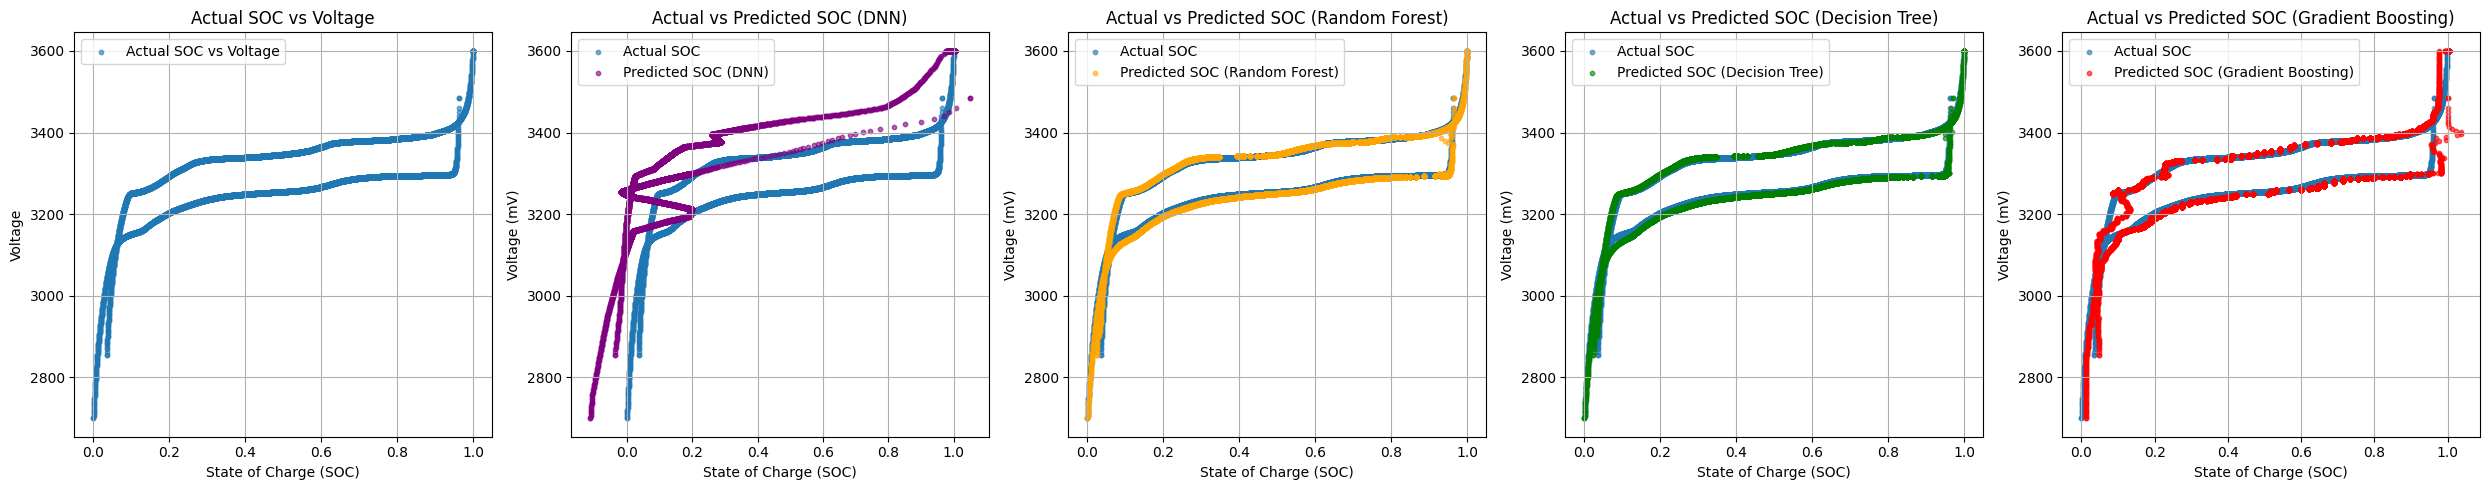

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan Anda sudah memiliki variabel y_true_3, y_pred_dnn_3, y_pred_rfr_3, y_pred_dt_3, y_pred_gbr_3
# dan voltage_test dari df_test_new

# Pastikan y_3 adalah numpy array jika belum
y_true_4 = y_4.values if isinstance(y_4, pd.Series) else y_4
# Pastikan voltage_test adalah numpy array jika belum
voltage_test = df_test_new['Voltage'].values if isinstance(df_test_new['Voltage'], pd.Series) else df_test_new['Voltage']


# Buat figure dan axes dengan 1 baris dan 5 kolom
fig, axes = plt.subplots(1, 5, figsize=(25, 5)) # Menambah 1 kolom, sesuaikan ukuran figure

# Plot untuk Actual SOC vs Voltage (subplot paling kiri)
axes[0].scatter(y_true_4, voltage_test, alpha=0.6, label='Actual SOC vs Voltage', s=10)
axes[0].set_xlabel("State of Charge (SOC)")
axes[0].set_ylabel("Voltage")
axes[0].set_title("Actual SOC vs Voltage")
axes[0].legend()
axes[0].grid(True)


# Plot untuk y_true_3 vs y_pred_dnn_3 (subplot kedua)
axes[1].scatter(y_true_4, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[1].scatter(y_pred_dnn_4, voltage_test, alpha=0.6, color='purple', label='Predicted SOC (DNN)', s=10)
axes[1].set_xlabel("State of Charge (SOC)")
axes[1].set_ylabel("Voltage (mV)")
axes[1].set_title("Actual vs Predicted SOC (DNN)")
axes[1].legend()
axes[1].grid(True)

# Plot untuk y_true_3 vs y_pred_rfr_3 (subplot ketiga)
axes[2].scatter(y_true_4, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[2].scatter(y_pred_rfr_4, voltage_test, alpha=0.6, color='orange', label='Predicted SOC (Random Forest)', s=10)
axes[2].set_xlabel("State of Charge (SOC)")
axes[2].set_ylabel("Voltage (mV)")
axes[2].set_title("Actual vs Predicted SOC (Random Forest)")
axes[2].legend()
axes[2].grid(True)

# Plot untuk y_true_3 vs y_pred_dt_3 (subplot keempat)
axes[3].scatter(y_true_4, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[3].scatter(y_pred_dt_4, voltage_test, alpha=0.6, color='green', label='Predicted SOC (Decision Tree)', s=10)
axes[3].set_xlabel("State of Charge (SOC)")
axes[3].set_ylabel("Voltage (mV)")
axes[3].set_title("Actual vs Predicted SOC (Decision Tree)")
axes[3].legend()
axes[3].grid(True)

# Plot untuk y_true_3 vs y_pred_gbr_3 (subplot kelima)
axes[4].scatter(y_true_4, voltage_test, alpha=0.6, label='Actual SOC', s=10)
axes[4].scatter(y_pred_gbr_4, voltage_test, alpha=0.6, color='red', label='Predicted SOC (Gradient Boosting)', s=10)
axes[4].set_xlabel("State of Charge (SOC)")
axes[4].set_ylabel("Voltage (mV)")
axes[4].set_title("Actual vs Predicted SOC (Gradient Boosting)")
axes[4].legend()
axes[4].grid(True)


# Atur tata letak agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()